In [2]:
#!pip install requests
#!pip install gmaps

In [20]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
import gmaps
import os


# Display the data table for preview
Airports_data_path = "Airport_data.csv"
Population_Density_path = "Population_Density.csv"
Confirmed_Cases_path = "Confirmed_Cases_By_State.csv"

# Read the mouse data and the study results
Airports = pd.read_csv(Airports_data_path)
Population_Density = pd.read_csv(Population_Density_path)
Confirmed_Cases = pd.read_csv(Confirmed_Cases_path)
#Airports.head(10)

# Import API key
#from api_keys import g_key


In [4]:
Airports.head()

,Airport,State,Code,Rank,Passengers 2009,Rank.1,Passengers 2018,Rank.2,Passengers 2019\t,Recent Change,Percent change,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,"Atlanta, GA (Hartsfield-Jackson Atlanta Intern...",Georgia,ATL,1.0,"42,155,204",1.0,"51,870,637",1.0,"53,504,022",26.9,3.1,NaN,NaN,NaN,NaN,NaN
1,"Los Angeles, CA (Los Angeles International)",California LA,LAX,3.0,"27,496,850",2.0,"42,736,738",2.0,"42,944,850",56.2,0.5,NaN,NaN,NaN,NaN,NaN
2,"Chicago, IL (Chicago O'Hare International)",Illinois,ORD,2.0,"31,124,151",3.0,"39,907,680",3.0,"40,888,335",31.4,2.5,NaN,NaN,NaN,NaN,NaN
3,"Dallas/Fort Worth, TX (Dallas/Fort Worth Inter...",Texas,DFW,4.0,"26,606,411",4.0,"32,799,363",4.0,"35,778,123",34.5,9.1,NaN,NaN,NaN,NaN,NaN
4,"Denver, CO (Denver International)",Colorado,DEN,5.0,"23,967,369",5.0,"31,364,910",5.0,"33,592,342",40.2,7.1,NaN,NaN,NaN,NaN,NaN


In [22]:
Airports.head()
Airports = Airports.drop(columns=["Rank", "Passengers 2009", "Rank.1", "Passengers 2018",
                                 "Recent Change", "Percent change"]) #"Unnamed: 11", "Unnamed: 12",
                                 #"Unnamed: 13", "Unnamed: 14", "Unnamed: 15"])
Airports = Airports.rename(columns={"Rank.2": "Rank",
                                   "Passengers 2019\t": "Passengers 2019"})
#Airports = Airports.drop(Airports[Airports["Rank.2"]>=10].index)
Airports.head(15)

,Airport,State,Code,Rank,Passengers 2019
0,"Atlanta, GA (Hartsfield-Jackson Atlanta Intern...",Georgia,ATL,1.0,"53,504,022"
1,"Los Angeles, CA (Los Angeles International)",California,LAX,2.0,"42,944,850"
2,"Chicago, IL (Chicago O'Hare International)",Illinois,ORD,3.0,"40,888,335"
3,"Dallas/Fort Worth, TX (Dallas/Fort Worth Inter...",Texas,DFW,4.0,"35,778,123"
4,"Denver, CO (Denver International)",Colorado,DEN,5.0,"33,592,342"
5,"New York, NY (John F. Kennedy International)",New York,JFK,6.0,"31,055,358"
6,"San Francisco, CA (San Francisco International)",California,SFO,7.0,"27,708,869"
7,"Seattle, WA (Seattle/Tacoma International)",Washington,SEA,8.0,"24,968,689"
8,"Orlando, FL (Orlando International)",Florida,MCO,9.0,"24,572,339"
9,"Las Vegas, NV (McCarran International)",Nevada,LAS,10.0,"24,462,857"


In [23]:
clean_airports = Airports.dropna(inplace=True)

clean_airports = Airports.set_index("State")

clean_airports = pd.DataFrame(clean_airports['Passengers 2019'])

clean_airports = clean_airports.reset_index()
clean_airports['Passengers 2019'] = clean_airports['Passengers 2019'].str.replace(',','')
clean_airports['Passengers 2019'] = clean_airports['Passengers 2019'].fillna(0)
clean_airports['Passengers 2019'] = clean_airports['Passengers 2019'].astype(int)
clean_airports.head(10)

,State,Passengers 2019
0,Georgia,53504022
1,California,42944850
2,Illinois,40888335
3,Texas,35778123
4,Colorado,33592342
5,New York,31055358
6,California,27708869
7,Washington,24968689
8,Florida,24572339
9,Nevada,24462857


In [7]:
#clean_airports.dtypes

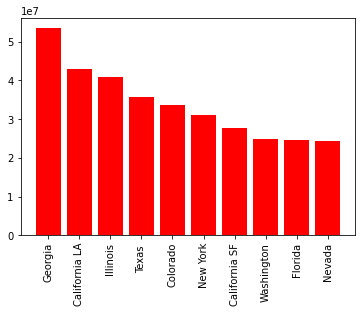

In [6]:

x_axis = np.arange(len(clean_airports))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, clean_airports["Passengers 2019"], color='r', align="center")
plt.xticks(tick_locations, clean_airports["State"], rotation="vertical")
plt.show()

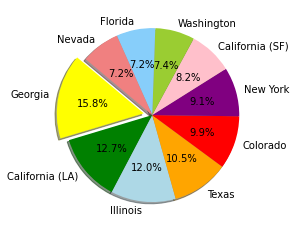

In [7]:
#setting the top states
states = ['Georgia', 'California (LA)', 'Illinois','Texas', 'Colorado', 'New York',  
          'California (SF)', 'Washington','Florida', 'Nevada']
#setting the colors to use for the pie chart
colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral"]
explode = (0.1,0,0,0,0,0,0,0,0,0)

#Setting up the pie plot
plt.pie(clean_airports['Passengers 2019'], explode=explode, labels=states, colors=colors, autopct='%1.1f%%', shadow=True, startangle = 140)

#Show output
plt.show()

In [8]:
#removing the "," from the numbers
Confirmed_Cases['Confirmed'] = Confirmed_Cases['Confirmed'].str.replace(',','')
Confirmed_Cases['Deaths'] = Confirmed_Cases['Deaths'].str.replace(',','')
#making an integer
Confirmed_Cases['Confirmed'] = Confirmed_Cases['Confirmed'].astype(int)
#putting in order by the highest
clean_cases = Confirmed_Cases.sort_values(by="Confirmed", ascending=False)
#printing 
clean_cases.head(10)



,State,Confirmed,Deaths
4,California,3169935,38224
43,Texas,2294073,35152
9,Florida,1676171,25833
32,New York,1361151,42610
13,Illinois,1112143,18964
35,Ohio,878284,10931
38,Pennsylvania,818369,21105
2,Arizona,738561,12643
33,North Carolina,733010,8915
10,Georgia,731826,12135


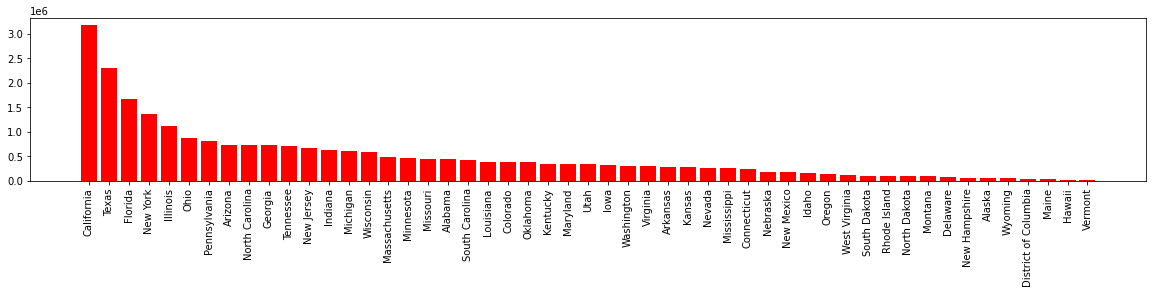

In [9]:
x_axis = np.arange(len(clean_cases))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, clean_cases["Confirmed"], color='r', align="center")
plt.xticks(tick_locations, clean_cases["State"], rotation="vertical")
plt.show()

In [10]:
cases_data_path = "Covid_cases_lng_lat.csv"
cases_data = pd.read_csv(cases_data_path)
#cases_data['Confirmed'] = cases_data['Confirmed'].astype(int)
#putting in order by the highest
#cases_data = cases_data.sort_values(by="Confirmed", ascending=False)

#making an integer
#cases_data_path['Confirmed'] = cases_data_path['Confirmed'].astype(int)
#cases_data = cases_data_path.sort_values(by="Confirmed", ascending=True)
cases_data.head(10)


,State,Confirmed,Lng,Lat
0,Arizona,"738,561",-111.0939,34.0489
1,California,"3,169,935",-119.4179,36.7783
2,Florida,"1,676,171",-81.5158,27.6648
3,Georgia,"731,826",-82.9001,32.1658
4,Illinois,"1,112,143",-89.3985,40.6331
5,New York,"1,361,151",-74.0060,40.7128
6,North Carolina,"733,010",-79.0193,35.7596
7,Ohio,"878,284",-82.9071,40.4173
8,Pennsylvania,"818,369",-77.1945,41.2033
9,Texas,"2,294,073",-99.9018,31.9686


In [15]:
#convert to list
confirmed_data = cases_data['Confirmed'].tolist()

marker_locations = cases_data[['Lat', 'Lng']]

#getting info from API key
gmaps.configure(api_key=g_key)
fig_map = gmaps.figure()
markers = gmaps.marker_layer(marker_locations, 
                             info_box_content=[f'Confirmed: {confirmed}' for confirmed in confirmed_data])
fig_map.add_layer(markers)
fig_map
#Setting Lat and Lng as locations
#locations = cases_data[['Lat', 'Lng']].astype(float)


Figure(layout=FigureLayout(height='420px'))

In [24]:

#making an integer
Population_Density['Pop'] = Population_Density['Pop'].astype(int)
#putting in order by the highest
clean_population = Population_Density.sort_values(by="Pop", ascending=False)
#printing 
clean_population.head(10)



,State,Density,Pop,LandArea
10,California,254.2929,39613500,155779
22,Texas,113.8080,29730300,261232
7,Florida,409.2233,21944600,53625
6,New York,409.5404,19300000,47126
9,Pennsylvania,286.1699,12804100,44743
11,Illinois,226.3964,12569300,55519
8,Ohio,286.6939,11714600,40861
16,Georgia,188.3053,10830000,57513
12,North Carolina,220.1037,10701000,48618
17,Michigan,176.7352,9992430,56539


In [ ]:
#clean_population = Population_Density.set_index("State")

#clean_population = pd.DataFrame(clean_population['Pop'])
#state = clean_population.loc[["California", "Texas", "Florida", "New York", "Illinois",
                             #"Pennsylvania", "Ohio", "Georgia", "North Carolina", "Michigan"], :]
#state.head(10)
#clean_population.head(10)


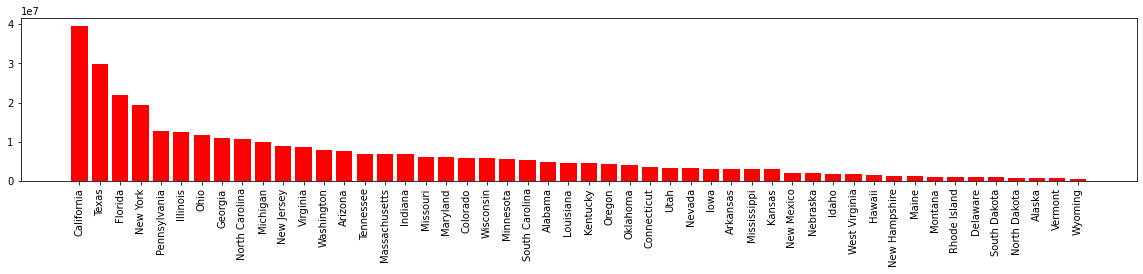

In [19]:
x_axis = np.arange(len(clean_population))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, clean_population["Pop"], color='r', align="center")
plt.xticks(tick_locations, clean_population["State"], rotation="vertical")
plt.show()

In [29]:
# Combine the data into a single dataset
#bigdata = pd.concat([clean_airports, clean_population, clean_cases])
merge_data_df = pd.merge(clean_airports, clean_population, on="State")
# Display the data table for preview
merge_data_df.head(7)

,State,Passengers 2019,Density,Pop,LandArea
0,Georgia,53504022,188.3053,10830000,57513
1,Illinois,40888335,226.3964,12569300,55519
2,Colorado,33592342,56.8653,5893630,103642
3,New York,31055358,409.5404,19300000,47126
4,Washington,24968689,117.3248,7796940,66456
5,Florida,24572339,409.2233,21944600,53625
6,Nevada,24462857,29.0195,3185790,109781


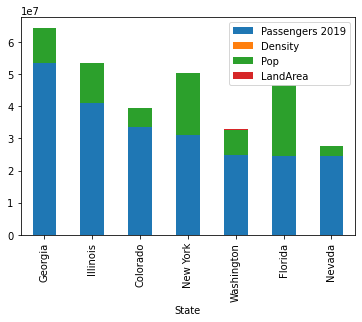

In [38]:
ax = merge_data_df.plot.bar(x='State', stacked=True)
